In [0]:
!git clone https://github.com/TheAstartes/d

fatal: destination path 'd' already exists and is not an empty directory.


In [0]:
!ls d

test.csv  train.csv


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import svm


In [0]:
datadir = 'd'

test_data = pd.read_csv(os.path.join(datadir, 'test.csv'))

test_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [0]:
train_data = pd.read_csv(os.path.join(datadir, 'train.csv'))

train_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [0]:
train_data.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


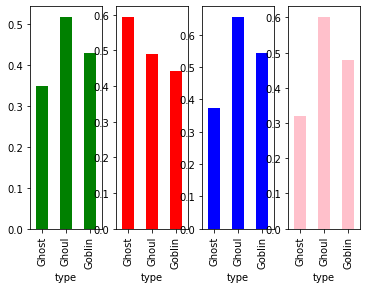

In [0]:
plt.subplot(2,6,1)
train_data.groupby('type').mean()['bone_length'].plot(kind='bar',figsize=(9,9), color='green')
plt.subplot(2,6,2)
train_data.groupby('type').mean()['rotting_flesh'].plot(kind='bar',figsize=(9,9), color='red')
plt.subplot(2,6,3)
train_data.groupby('type').mean()['hair_length'].plot(kind='bar',figsize=(9,9), color='blue')
plt.subplot(2,6,4)
train_data.groupby('type').mean()['has_soul'].plot(kind='bar',figsize=(9,9), color='pink')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


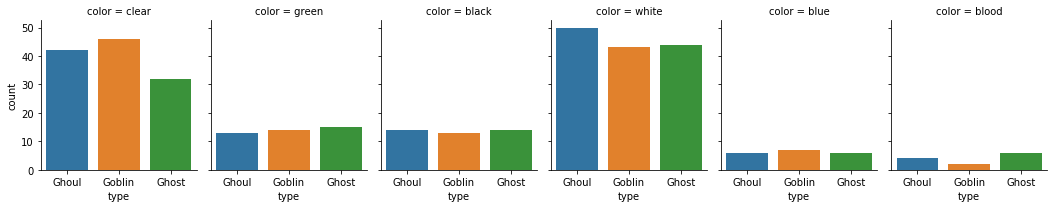

In [0]:
sns.factorplot("type", col="color", col_wrap=10, data=train_data, kind="count", size=3, aspect=.8)

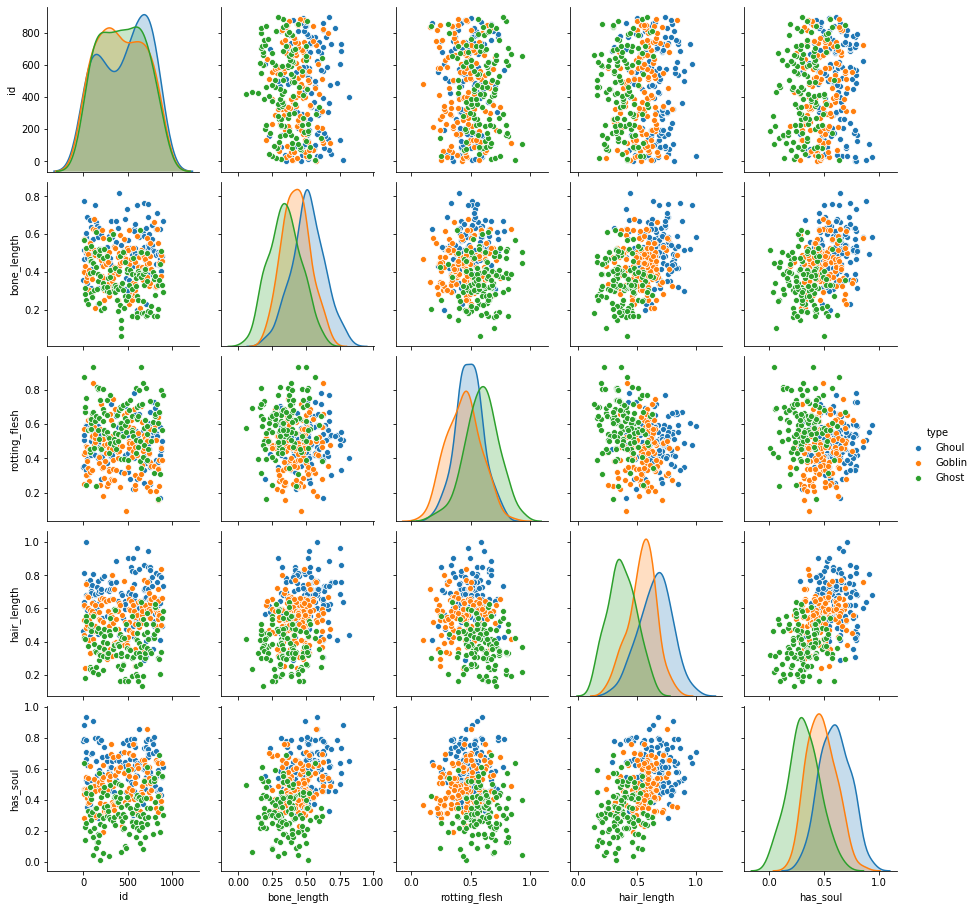

In [0]:
sns.pairplot(train_data, hue='type')

In [0]:
train_data['has_soulxbone_length'] = train_data['has_soul'] * train_data['bone_length']
train_data['has_soulxhair_length'] = train_data['has_soul'] * train_data['hair_length']

train_data['has_soulxbone_lengthxhair_length'] = train_data['has_soul'] * train_data['bone_length'] * train_data['hair_length']

test_data['has_soulxbone_length'] = test_data['has_soul'] * test_data['bone_length']
test_data['has_soulxhair_length'] = test_data['has_soul'] * test_data['hair_length']

test_data['has_soulxbone_lengthxhair_length'] = test_data['has_soul'] * test_data['bone_length'] * test_data['hair_length']

In [0]:
test_id = train_data['id']

test_data.drop(['id'], axis=1, inplace=True)
train_data.drop(['id'], axis=1, inplace=True)

In [0]:
dummies_color = pd.get_dummies(train_data['color'], drop_first=False)

train_data.drop('color', axis=1, inplace=True)
train_data = train_data.join(dummies_color)

dummies_color = pd.get_dummies(test_data['color'], drop_first=False)

test_data.drop('color', axis=1, inplace=True)
test_data = test_data.join(dummies_color)
train_data.head()

,bone_length,rotting_flesh,hair_length,has_soul,type,has_soulxbone_length,has_soulxhair_length,has_soulxbone_lengthxhair_length,black,blood,blue,clear,green,white
0,0.354512,0.350839,0.465761,0.781142,Ghoul,0.276924,0.363825,0.128980,0,0,0,1,0,0
1,0.575560,0.425868,0.531401,0.439899,Goblin,0.253188,0.233763,0.134545,0,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,Ghoul,0.370195,0.642171,0.300456,1,0,0,0,0,0
3,0.776652,0.508723,0.636766,0.884464,Ghoul,0.686921,0.563196,0.437408,1,0,0,0,0,0
4,0.566117,0.875862,0.418594,0.636438,Ghost,0.360298,0.266409,0.150818,0,0,0,0,1,0


In [0]:
test_data.head()

,bone_length,rotting_flesh,hair_length,has_soul,has_soulxbone_length,has_soulxhair_length,has_soulxbone_lengthxhair_length,black,blood,blue,clear,green,white
0,0.471774,0.387937,0.706087,0.698537,0.329552,0.493228,0.232692,1,0,0,0,0,0
1,0.427332,0.645024,0.565558,0.451462,0.192924,0.255328,0.109110,0,0,0,0,0,1
2,0.549602,0.491931,0.660387,0.449809,0.247216,0.297048,0.163258,1,0,0,0,0,0
3,0.638095,0.682867,0.471409,0.356924,0.227752,0.168257,0.107364,0,0,0,0,0,1
4,0.361762,0.583997,0.377256,0.276364,0.099978,0.104260,0.037717,1,0,0,0,0,0


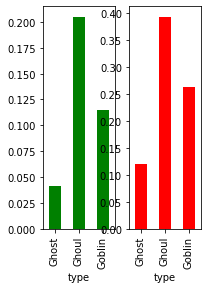

In [0]:
plt.subplot(2,6,1)
train_data.groupby('type').mean()['has_soulxbone_lengthxhair_length'].plot(kind='bar',figsize=(9,9), color='green')
plt.subplot(2,6,2)
train_data.groupby('type').mean()['has_soulxhair_length'].plot(kind='bar',figsize=(9,9), color='red')

In [0]:
x_train = train_data.drop('type', axis=1)


le = LabelEncoder()
y_train = le.fit_transform(train_data.type.values)




In [0]:
clf = RandomForestClassifier(n_estimators=400)
clf = clf.fit(x_train, y_train)

variables = np.argsort(clf.feature_importances_)[::-1]

for f in range(x_train.shape[1]):
    print('variable: %s (%f)' % (x_train.columns[variables[f]],
                                      clf.feature_importances_[variables[f]]))

variable: has_soulxbone_lengthxhair_length (0.216573)
variable: has_soulxhair_length (0.169638)
variable: hair_length (0.135920)
variable: has_soulxbone_length (0.127477)
variable: rotting_flesh (0.118097)
variable: has_soul (0.103793)
variable: bone_length (0.086347)
variable: clear (0.010318)
variable: white (0.010096)
variable: green (0.007472)
variable: blue (0.006409)
variable: black (0.005944)
variable: blood (0.001915)


In [0]:
x_train = x_train[x_train.columns[indices[0:7]]]

x_test = x_test[x_test.columns[indices[0:7]]]


In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(x_train, y_train, test_size=0.20, random_state=36)

In [0]:
model = RandomForestClassifier()

model.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
model.score(xtest, ytest)


0.6933333333333334

Text(33.0, 0.5, 'Truth')

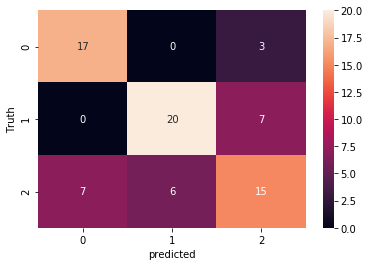

In [0]:
y_predicted = model.predict(xtest)

matrix = confusion_matrix(ytest, y_predicted)

sns.heatmap(matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [0]:
parameter_grid = {
                  'max_depth' : [None, 5, 100],
                  'min_samples_split' : [2, 5, 7],
                  'min_weight_fraction_leaf' : [0.0, 0.1],
                  'max_leaf_nodes' : [40, 80],
                  'criterion' : ['gini', 'entropy'],
                  'max_features' : ['auto', 'sqrt', 'log2']
                 }
grid_search = GridSearchCV(model,scoring='accuracy',param_grid=parameter_grid, cv=StratifiedKFold(5))
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='deprecated', n_jobs=None,
      

In [0]:

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7565536723163843
Best parameters: {'criterion': 'gini', 'max_depth': 100, 'max_features': 'auto', 'max_leaf_nodes': 80, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0}


Text(33.0, 0.5, 'Truth')

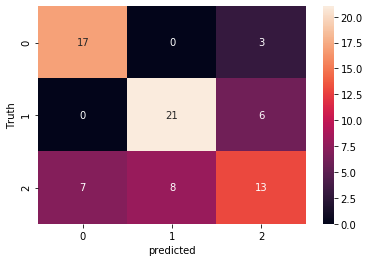

In [0]:
y_predicted = grid_search.predict(xtest)

matrix = confusion_matrix(ytest, y_predicted)

sns.heatmap(matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')